In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os
import glob
%matplotlib inline

Image shape: (1080, 1920, 3)


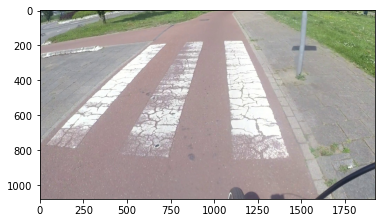

In [2]:
#Inladen van één testfoto
image = mpimg.imread('test_images/00037.jpg')

#Print de foto
print('Image shape:', image.shape)
plt.imshow(image)

In [18]:
#Alle beschikbare foto's in de 'test_images' map
os.listdir("test_images/")

['00037.jpg',
 '00087.jpg',
 '00435.jpg',
 '00487.jpg',
 '01355.jpg',
 '01375.jpg',
 '02304.jpg']

In [19]:
#Functie om de foto's weer te geven
def show_images(images, cols=3, save=False, title='Default'):
    cmap = None
    columns = cols
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(10,12))
    for i,image in enumerate(images):
        plt.subplot(rows,columns, i+1)
        if len(image.shape) == 2:
            cmap = 'gray'
        plt.subplot(rows,cols,i+1)
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    if save:
        plt.savefig('image_output/' + title + '.png')
    plt.show()

<ipython-input-19-e48662c39ebd>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows,cols,i+1)


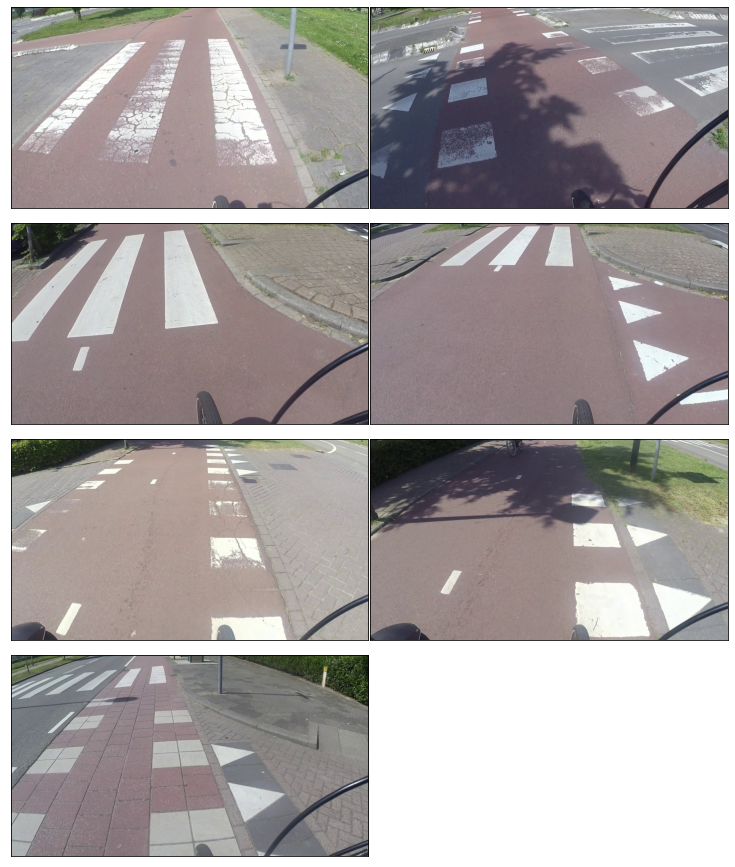

In [20]:
#Defineer de 'input images' (vanuit de map "test_images")
input_images = [mpimg.imread(img_path) for img_path in glob.glob("test_images/*")]

show_images(input_images, cols=2, save=True, title='Inputimages')

In [ ]:
#Functie voor het uitsnijden
ROI= np.array([[(0,1030), (0, 700), (500, 0),(1250, 0),(1750, 1030)]], dtype=np.int32)
blank= np.zeros_like(image)
region_of_interest= cv2.fillPoly(blank, ROI,(255,255,255))

def cutout(img):
    return cv2.bitwise_and(img, region_of_interest)

<ipython-input-19-e48662c39ebd>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows,cols,i+1)


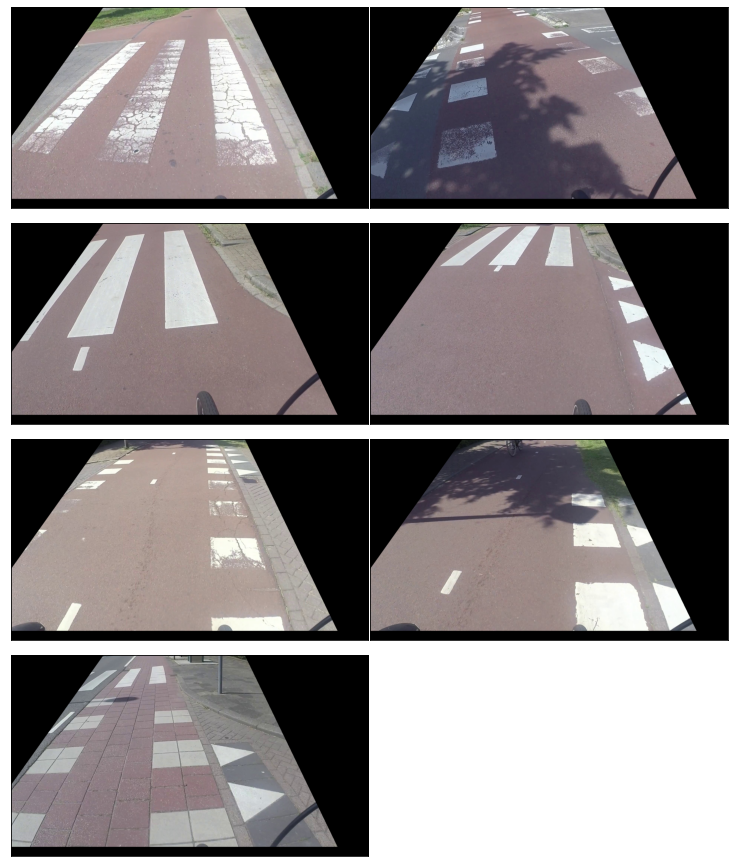

In [24]:
cut_images = list(map(cutout, input_images))
show_images(cut_images, cols=2, save=True, title='cutout_images')

<ipython-input-19-e48662c39ebd>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows,cols,i+1)


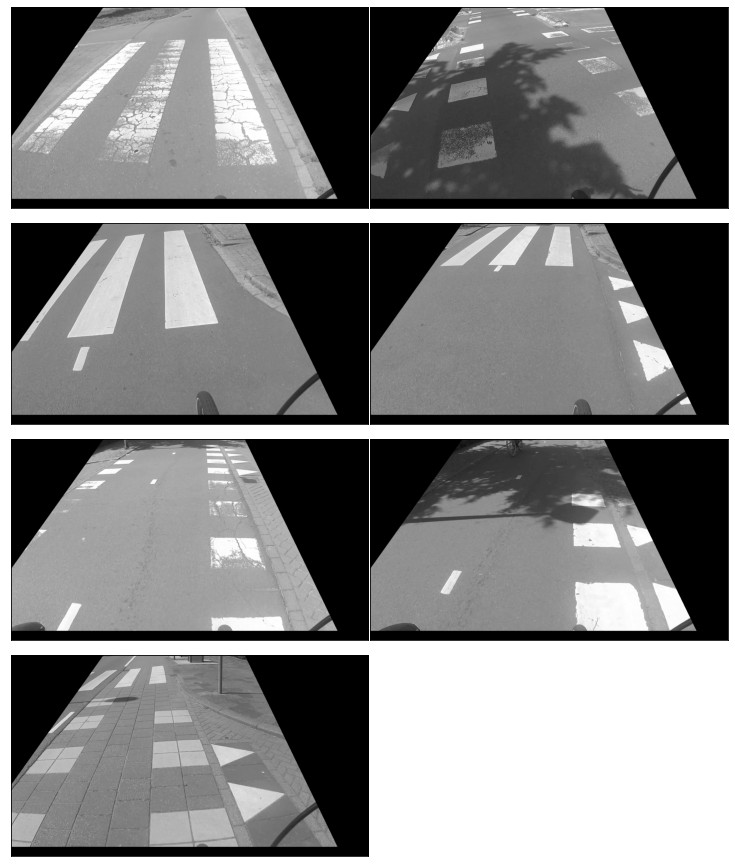

In [25]:
#Omzetten naar grijswaarden
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray_scale_images = list(map(grayscale, cut_images))
show_images(gray_scale_images, cols=2, save=True, title='grayscale_images')

<ipython-input-19-e48662c39ebd>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows,cols,i+1)


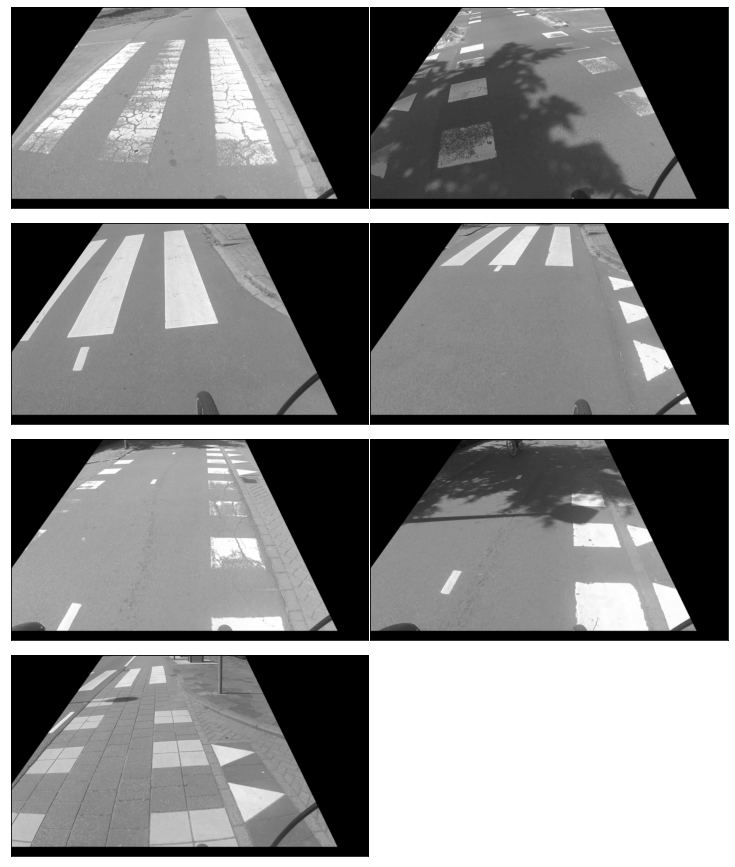

In [26]:
#Functie omm gaussian blur toe te voegen
def gaussian_blur(img, kernel_size=5):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

#Pas Gaussian blur toe
gussian_blur_img = list(map(gaussian_blur, gray_scale_images))
show_images(gussian_blur_img, cols = 2, save=True, title='Gaussian_blur')

<ipython-input-19-e48662c39ebd>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(rows,cols,i+1)


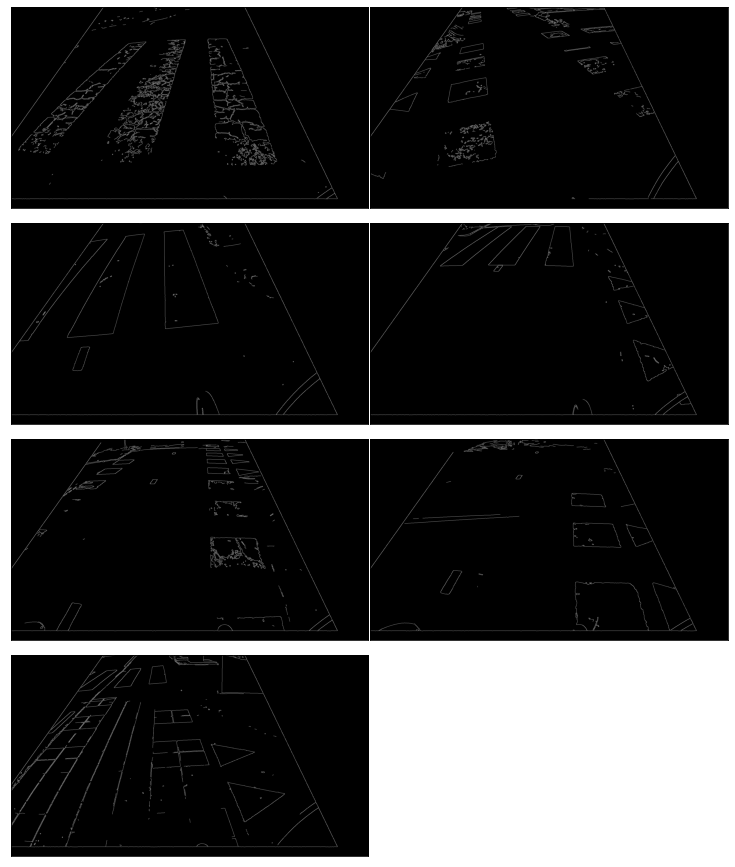

In [27]:
#Canny Edge detection toepassen

def canny(img, low_threshold = 100, high_threshold = 200):
    return cv2.Canny(img, low_threshold, high_threshold)

edge_detection = list(map(canny, gussian_blur_img))
show_images(edge_detection, cols =2, save=True, title = 'Canny_edge_image')